In [1]:
import pandas as pd  
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset Importation 

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### Dataset Visualisation

In [3]:
print("Train Dataset lines numbers :",train.shape[0]," and colums numbers : ",train.shape[1])

print("Test Dataset lines numbers :", test.shape[0], " and colums numbers : ", test.shape[1])

Train Dataset lines numbers : 891  and colums numbers :  12
Test Dataset lines numbers : 418  and colums numbers :  11


In [4]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train.head(11)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
# Il y'a t'il des données dupliquées ??
train.duplicated().sum()

0

In [7]:
 toto = train[train["Name"] == "Nasser, Mr. Nicholas"] ## Nasser, Mr. Nicholas

In [8]:
toto

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
122,123,0,2,"Nasser, Mr. Nicholas",male,32.5,1,0,237736,30.0708,NaN,C


In [9]:
 toto = train[train["SibSp"] == 8] ## Nasser, Mr. Nicholas

In [10]:
 toto

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [11]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Determinons les colonnes vides

In [13]:
(train.isna().sum()/train.shape[0])*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [14]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
(train['Sex'].value_counts()/train.shape[0])*100

male      64.758698
female    35.241302
Name: Sex, dtype: float64

<AxesSubplot:>

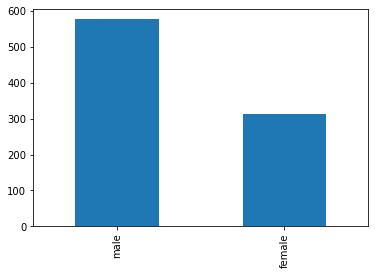

In [16]:
train['Sex'].value_counts().plot(kind='bar')

In [17]:
(train['Survived'].value_counts()/train.shape[0])*100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

<AxesSubplot:>

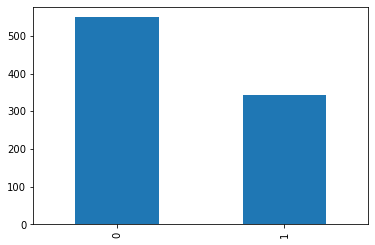

In [18]:
train['Survived'].value_counts().plot(kind='bar')

In [19]:
train.groupby(['Sex']).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


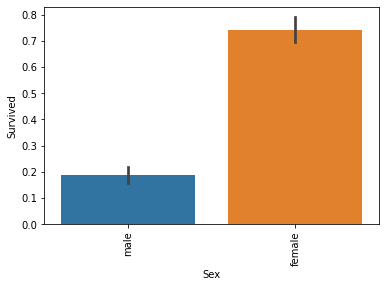

In [20]:
### Survie en fonction du groupe du sexe.
sns.barplot(x=train['Sex'],y= train['Survived'])
plt.xticks(rotation='vertical')
plt.show()

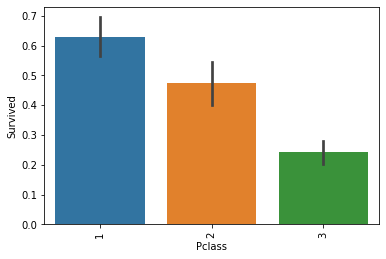

In [21]:
### Survie en fonction de la classe.
sns.barplot(x=train['Pclass'],y= train['Survived'])
plt.xticks(rotation='vertical')
plt.show()

In [22]:
###Les survivants en fonction du sexe et de la classe
train.pivot_table('Survived', index='Sex',columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [23]:
def age_groupe(a):
    if a < 10:
        return "CH"
    if a >= 10 and a < 18:
        return "TEEN"
    if a>= 18 and a < 64 :
        return "ADLT"
    if a > 65 :
        return "OLD"

In [24]:
train['age_group'] = train['Age'].apply(age_groupe) 

<AxesSubplot:ylabel='age_group'>

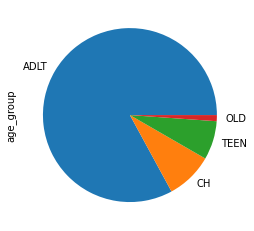

In [25]:
train['age_group'].value_counts().plot.pie()

In [26]:
train['age_group'].value_counts()

ADLT    588
CH       62
TEEN     51
OLD       8
Name: age_group, dtype: int64

<AxesSubplot:>

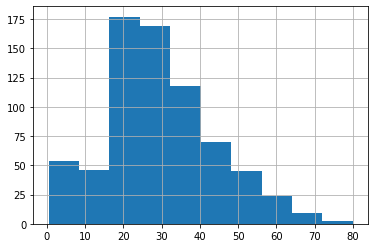

In [27]:
train['Age'].hist()

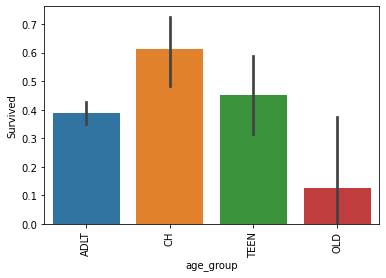

In [28]:
### Survie en fonction du groupe d'age.
sns.barplot(x=train['age_group'],y= train['Survived'])
plt.xticks(rotation='vertical')
plt.show()

In [29]:
### Les survivants en fonction du sexe et du group d'age
train.pivot_table('Survived', index='Sex',columns='age_group')

age_group,ADLT,CH,OLD,TEEN
Sex,,,,
female,0.771845,0.633333,NaN,0.760000
male,0.180628,0.593750,0.125,0.153846


In [30]:
train.groupby(train['age_group']).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
age_group,,,,,,,
ADLT,453.001701,0.387755,2.183673,32.802721,0.338435,0.311224,35.096888
CH,424.741935,0.612903,2.629032,4.083387,1.854839,1.403226,30.576679
OLD,455.500000,0.125000,1.750000,71.562500,0.125000,0.125000,27.710425
TEEN,434.647059,0.450980,2.529412,15.068627,0.980392,0.627451,32.003845


In [31]:
print(train['Embarked'].unique())

['S' 'C' 'Q' nan]


<AxesSubplot:xlabel='Embarked', ylabel='count'>

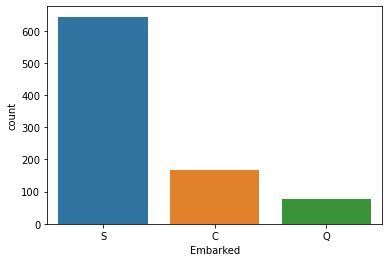

In [32]:
sns.countplot(x=train['Embarked'])

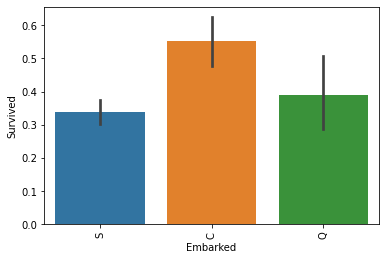

In [33]:
sns.barplot(x = train['Embarked'], y = train['Survived'])
plt.xticks(rotation='vertical')
plt.show()

### Preprocessing

In [34]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()

train.iloc[:, 4] = labelEncoder.fit_transform(train.iloc[:,4].values)
train.iloc[:,11] = labelEncoder.fit_transform(train.iloc[:,11].values)

In [35]:
#train['Sex'].replace(['male','female'],[1,0], inplace = True)

In [36]:
#train['Embarked'].replace(['S','C','Q'],[0,1,2], inplace = True) On va plutot utilisé des fonctions utiles du preprocessing

In [37]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,ADLT
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,ADLT
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,ADLT
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,ADLT
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,ADLT


In [38]:
train['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [39]:
# permet de supprimer les lignes contenant des valeurs manquantes
train.dropna(axis=0, inplace=True)

In [40]:
#Suppression des colonnes non indispensable à la prediction.
#train.drop(columns=['Pclass', 'Sex','Age','Cabin','age_group','Name', 'Ticket'],inplace=True, axis = 1)

In [41]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'age_group'],
      dtype='object')

### Selection de variables

In [42]:
from sklearn.feature_selection import chi2

In [43]:
#Usage de l'ancienne Méthode
(train.corr()['Survived'])*100

PassengerId     13.594758
Survived       100.000000
Pclass          -4.689328
Sex            -52.572510
Age            -21.024520
SibSp            9.780279
Parch            6.165878
Fare            15.134905
Embarked        -8.688908
Name: Survived, dtype: float64

In [44]:
#Methode Pearson pour les features continues.
(train.iloc[:, [0,1,6,7,8, 9]].corr(method='kendall'))*100

,PassengerId,Survived,SibSp,Parch,Fare
PassengerId,100.000000,11.363330,-3.827375,-2.798998,-0.804812
Survived,11.363330,100.000000,10.829240,6.126614,15.407029
SibSp,-3.827375,10.829240,100.000000,16.726277,29.925996
Parch,-2.798998,6.126614,16.726277,100.000000,26.237812
Fare,-0.804812,15.407029,29.925996,26.237812,100.000000


In [45]:
#Methode  pour les features catégorielles : Sex, Pclass, Embarked, Age.
from scipy.stats import chi2_contingency
crossTable = pd.crosstab(train['Sex'], train['Survived'])
resultat = chi2_contingency(crossTable)
print(crossTable)
print("statistique de test :", resultat[0])
print("p_valeur :", resultat[1])  # D'après les resultats les deux variables sont corrélées
print("degré de liberté :", resultat[2])

Survived   0   1
Sex             
0          6  84
1         51  41
statistique de test : 48.06073799474532
p_valeur : 4.132184264629428e-12
degré de liberté : 1


In [46]:
crossTable = pd.crosstab(train['Pclass'], train['Survived'])
resultat = chi2_contingency(crossTable)
print(crossTable)
print("statistique de test :", resultat[0])
print("p_valeur :", resultat[1])  # D'après les resultats les deux variables ne sont pas sont corrélées p > 5% 
print("degré de liberté :", resultat[2])

Survived   0    1
Pclass           
1         49  108
2          3   12
3          5    5
statistique de test : 2.5167047044362496
p_valeur : 0.28412177366282276
degré de liberté : 2


In [47]:
crossTable = pd.crosstab(train['Embarked'], train['Survived'])
resultat = chi2_contingency(crossTable)
print(crossTable)
print("statistique de test :", resultat[0])
print("p_valeur :", resultat[1])  # D'après les resultats les deux variables ne sont pas sont corrélées p > 5% 
print("degré de liberté :", resultat[2])

Survived   0   1
Embarked        
0         16  48
1          1   1
2         40  74
3          0   2
statistique de test : 3.1772976300400133
p_valeur : 0.3650888445595106
degré de liberté : 3


In [48]:
crossTable = pd.crosstab(train['Age'], train['Survived'])
resultat = chi2_contingency(crossTable)
print(crossTable)
print("statistique de test :", resultat[0])
print("p_valeur :", resultat[1])  # D'après les resultats les deux variables ne sont pas sont corrélées p > 5% 
print("degré de liberté :", resultat[2])

Survived  0  1
Age           
0.92      0  1
1.00      0  1
2.00      2  1
3.00      0  1
4.00      0  3
...      .. ..
62.00     1  1
63.00     0  1
70.00     1  0
71.00     1  0
80.00     0  1

[61 rows x 2 columns]
statistique de test : 72.73012851320222
p_valeur : 0.12534268437734264
degré de liberté : 60


In [49]:
train.var(axis = 0)

C:\Users\Mamadou\AppData\Local\Temp/ipykernel_9800/536037505.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.var(axis = 0)


PassengerId    62110.591980
Survived           0.216289
Pclass             0.266681
Sex                0.251351
Age              235.902732
SibSp              0.415640
Parch              0.503066
Fare            5656.577339
Embarked           0.939105
dtype: float64

In [50]:
train.mean(axis = 0)

C:\Users\Mamadou\AppData\Local\Temp/ipykernel_9800/1963217632.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.mean(axis = 0)


PassengerId    457.543956
Survived         0.686813
Pclass           1.192308
Sex              0.505495
Age             35.353956
SibSp            0.461538
Parch            0.450549
Fare            78.062432
Embarked         1.296703
dtype: float64

#### Suppression des variables non indispensables à la prédiction

In [51]:
train.drop(columns=['Pclass','Age','Cabin','age_group','Name', 'Ticket', 'Embarked'],inplace=True, axis = 1)

In [52]:
train.columns

Index(['PassengerId', 'Survived', 'Sex', 'SibSp', 'Parch', 'Fare'], dtype='object')

### Prediction

In [53]:
x = train.iloc[:, [0,2,3,4,5]].values  #On peut aussi faire :train.drop(columns = ['Survived'])
y = train.iloc[:, 1].values #train.drop(columns = ['PassengerId','SibSp','Parch','Fare','Embarked']) #On peut aussi faire : train.drop(columns = ['PassengerId','SibSp','Parch','Fare','Embarked'])

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, shuffle=True, random_state = 0 )

In [55]:
#Scale the data (standardisation)
from sklearn.preprocessing  import StandardScaler
sc = StandardScaler() # Objet permettant la standardisation des données.
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [56]:
x_train #x_train

array([[-0.80765473, -1.04949954, -0.69362981, -0.60776316,  0.14225963],
       [ 0.15457858,  0.9528351 , -0.69362981, -0.60776316, -0.57954637],
       [ 0.76467545, -1.04949954, -0.69362981, -0.60776316, -0.07943792],
       [-0.09928723,  0.9528351 , -0.69362981, -0.60776316, -0.63045947],
       [-0.63568112, -1.04949954, -0.69362981,  0.88589207,  2.21771998],
       [-1.29081869,  0.9528351 , -0.69362981, -0.60776316,  0.04816707],
       [-1.11065586,  0.9528351 ,  2.60395454,  0.88589207, -0.46998653],
       [ 0.17095702, -1.04949954,  0.95516237, -0.60776316,  0.0361374 ],
       [-0.60292424, -1.04949954,  0.95516237, -0.60776316,  0.43098203],
       [ 0.67049942, -1.04949954,  2.60395454,  0.88589207, -0.46998653],
       [ 0.41663361, -1.04949954,  0.95516237, -0.60776316, -0.46225289],
       [-1.3768055 ,  0.9528351 , -0.69362981,  0.88589207,  2.21771998],
       [ 0.99806821,  0.9528351 ,  0.95516237,  0.88589207,  0.45654557],
       [ 0.92027062,  0.9528351 , -0.6

In [57]:
from sklearn.ensemble  import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [58]:
from sklearn.model_selection import cross_val_score,  StratifiedKFold, KFold

In [59]:
resultat = cross_val_score(KNeighborsClassifier(), x_train, y_train,cv= 5)
print(resultat, "la moyenne :" , resultat.mean())

[0.82758621 0.75862069 0.75862069 0.62068966 0.75862069] la moyenne : 0.7448275862068966


In [60]:
resultat = cross_val_score(RandomForestClassifier(), x_train, y_train, cv= 5)
print(resultat, "la moyenne :" , resultat.mean())

[0.68965517 0.75862069 0.82758621 0.62068966 0.72413793] la moyenne : 0.7241379310344828


In [61]:
resultat = cross_val_score(LogisticRegression(), x_train, y_train, cv= 5)
print(resultat, "la moyenne :" , resultat.mean())

[0.72413793 0.79310345 0.79310345 0.5862069  0.75862069] la moyenne : 0.7310344827586206


In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

In [63]:
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [64]:
param_grid = {'n_neighbors' : np.arange(1,20),
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]} # P : 2 la métrique euclidienne standard, P1 : la métrique par défaut est minkowski

clf_knn = GridSearchCV(estimator= KNeighborsClassifier(), param_grid = param_grid, cv = 5)
best_clf_knn = clf_knn.fit(x_train, y_train)
clf_performance(best_clf_knn, "KNeighborsClassifier")

KNeighborsClassifier
Best Score: 0.7586206896551724
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 4, 'p': 2, 'weights': 'uniform'}


In [65]:
models = []
models.append(best_clf_knn.best_estimator_) 

In [66]:
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(estimator=LogisticRegression(), param_grid = param_grid, cv = 5)
best_clf_lr = clf_lr.fit(x_train, y_train)
clf_performance(best_clf_lr, "Logistic Regression")

Logistic Regression
Best Score: 0.7448275862068965
Best Parameters: {'C': 0.08858667904100823, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


In [67]:
models.append(best_clf_lr.best_estimator_)  

In [68]:
# random forest
param_grid =  {'n_estimators': np.arange(1,150), 
                                  'bootstrap': [True,False],
                                  'max_depth': [3,5,10,20,50,75,100, None],
                                  'min_samples_leaf': [1,2,4,10],
                                  'min_samples_split': [2,5,10],
                                  'criterion' :['gini', 'entropy'],
              }
                                  
clf_rf_rnd = RandomizedSearchCV(estimator= RandomForestClassifier(), param_distributions = param_grid, n_iter = 100, cv = 5)
#clf_rf_rnd = GridSearchCV(estimator= RandomForestClassifier(), param_grid = param_grid, cv = 5)
best_clf_rf_rnd = clf_rf_rnd.fit(x_train, y_train)
clf_performance(best_clf_rf_rnd,'Random Forest')

Random Forest
Best Score: 0.7724137931034483
Best Parameters: {'n_estimators': 51, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None, 'criterion': 'gini', 'bootstrap': False}


In [69]:
models.append(best_clf_rf_rnd.best_estimator_)  

In [70]:
models

[KNeighborsClassifier(n_neighbors=4),
 LogisticRegression(C=0.08858667904100823, max_iter=2000, penalty='l1',
                    solver='liblinear'),
 RandomForestClassifier(bootstrap=False, min_samples_leaf=2, min_samples_split=5,
                        n_estimators=51)]

In [71]:
print("KNeighborsClassifiermodels Score :", models[0].score(x_train, y_train)) #
print("LogisticRegression Score :", models[1].score(x_train, y_train) )#
print("RandomForestClassifier Score :",models[2].score(x_train, y_train)) #

KNeighborsClassifiermodels Score : 0.8137931034482758
LogisticRegression Score : 0.7448275862068966
RandomForestClassifier Score : 0.9655172413793104


In [72]:
test = pd.read_csv("test.csv")

In [73]:
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [74]:
test.drop(columns=['Pclass','Age','Cabin','Name', 'Ticket', 'Embarked'],inplace=True, axis = 1)

In [75]:
test.columns

Index(['PassengerId', 'Sex', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [76]:
test = train.iloc[:, [0,2,3,4,5]].values
test = sc.fit_transform(test)

In [77]:
models[0].predict(test) #KNeighborsClassifiermodels

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0], dtype=int64)

In [78]:
models[1].predict(test) #LogisticRegression Score

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0], dtype=int64)

In [79]:
models[2].predict(test) #RandomForestClassifier

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1], dtype=int64)

In [80]:
import random
names = ["Coumba", "Lothaire" ,"Ousmane", "Roland", "Nasser",  "Ndella ", "Steve", "Ba"]
len(names)

8

In [81]:
def selectRandom(groups):
    while len(groups)!= 0:
        choix =  random.choice(groups)
        print("The name selected is: ",choix)
        del groups[groups.index(choix)]
    return 0 

In [82]:
selectRandom(names)

The name selected is:  Steve
The name selected is:  Coumba
The name selected is:  Ndella 
The name selected is:  Lothaire
The name selected is:  Nasser
The name selected is:  Roland
The name selected is:  Ousmane
The name selected is:  Ba


0